In [1]:
import torch
from time import time
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms
import pandas as pd
import numpy as np
import zipfile
import os
from torchvision.io import read_image

In [12]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

1
0
NVIDIA GeForce GTX 1050 Ti
True


In [3]:
def read_csvfile(filename):
    with zipfile.ZipFile("RHC.zip") as z:
   # open the csv file in the dataset
       with z.open(filename) as f:
        return pd.read_csv(f)       

In [19]:
points_all_df=read_csvfile('points_all.csv')
image_list_df=read_csvfile('image_list.csv')
points_inroom_df=read_csvfile('points_inroom.csv')
image_trainlist_df=pd.read_csv(r"F:\New folder (2)\RHC\img_train_list.csv")


In [38]:
print(len(points_all_df))
points_all_df.head()

5581


,FILENAME,X,Y
0,20180416_2_1029.58745.jpg,377,179
1,20180416_2_1029.58745.jpg,369,200
2,20180416_2_1170.0.jpg,421,93
3,20180416_2_1170.0.jpg,430,124
4,20180416_2_1170.0.jpg,386,155


In [37]:
print(len(points_inroom_df))
points_inroom_df.head()

4904


,FILENAME,X,Y
0,20180226_0.0.jpg,208,198
1,20180226_0.0.jpg,400,138
2,20180226_1015.11135.jpg,233,206
3,20180226_1015.11135.jpg,296,162
4,20180226_1015.11135.jpg,301,144


In [36]:
print(len(image_list_df))
image_list_df.head()

1195


,image_name,count,type
0,20180227_570.0.jpg,5,test
1,20180226_2998.761014716.jpg,12,test
2,20180516_1239.8525.jpg,3,test
3,20180404_18759.4638.jpg,0,test
4,20180424_5357.6437499.jpg,9,test


In [35]:
print(len(image_trainlist_df))
image_trainlist_df.head()

717


,20180226_0.0.jpg
0,20180226_1015.11135.jpg
1,20180226_1320.6303.jpg
2,20180226_2_10622.5747999.jpg
3,20180226_2_11150.821884018.jpg
4,20180226_2_11172.896408888.jpg


In [24]:
def check_annocsv(data):
    path=r"F:\New folder (2)\RHC\anno\all\den"
    dir=path+'\\'+data
    for i in os.listdir(dir):
        a=pd.read_csv(path+'\\'+data+'\\'+i)
        a.drop_duplicates()
        break
    return a
b=check_annocsv('train')


In [8]:
dir=r"F:\New folder (2)\RHC\img\train"
train_images=[]
train_labels=[]
for i in os.listdir(dir):
    d=torch.tensor(image_list_df[image_list_df.image_name==i]['count'].values)
    train_labels.append(d)
    tsr_img = torchvision.io.read_image(dir+'\\'+i)
    train_images.append(tsr_img)

In [42]:
def showimage(imagename):
    i=imagename
    d=torch.tensor(image_list_df[image_list_df.image_name==i]['count'].values)
    tsr_img = torchvision.io.read_image(dir+'\\'+i)
    print('number of people is',d)
    plt.imshow(tsr_img.permute(1,2,0))

In [43]:
pwd()

'C:\\Users\\DELL\\Desktop\\Python'

number of people is tensor([3])


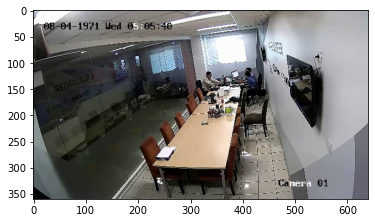

In [41]:
showimage('20180415_9072.11775.jpg')

In [9]:
print(len(train_images))
print(len(train_labels))
print(train_images[0].shape)
print(train_labels[0].shape)

717
717
torch.Size([3, 360, 640])
torch.Size([1])


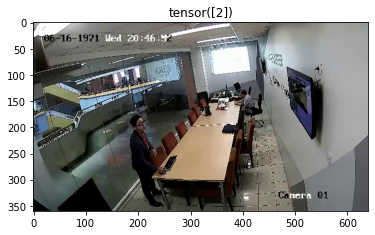

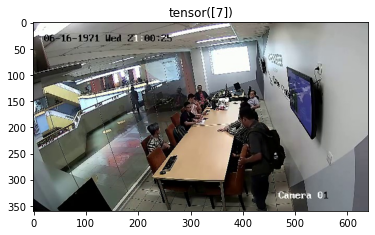

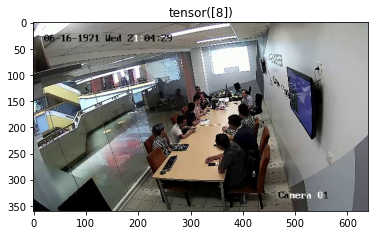

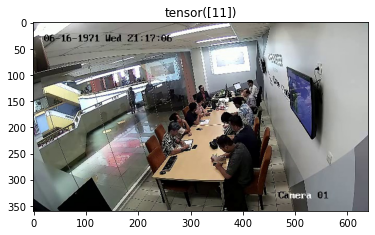

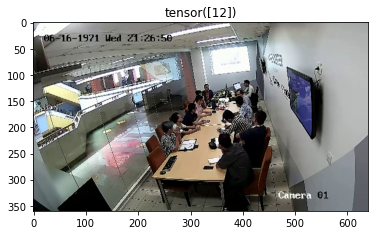

In [11]:
for i in range(5):
    plt.imshow(train_images[i].permute(1,2,0))
    plt.title(f'{train_labels[i]}')
    plt.show()